#ABOUT THE DATASET

The Census Household Amenities Dataset provides detailed information on housing conditions, basic infrastructure, and household amenities across Indian districts, segmented by rural and urban categories. It includes over 1200 district-level records covering housing quality (good, livable, dilapidated), access to facilities (cooking fuel, water source, electricity, latrines), and asset ownership (TVs, phones, radios, etc.). The data captures whether households have essential amenities and what materials are used in their construction (roof, floor, wall), alongside occupancy types and vacant housing statistics. This dataset enables granular analysis of socio-economic disparities, infrastructure gaps, and regional development patterns in India's housing landscape.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("census-household-amenities.csv")  # Replace with the actual filename
df.head()


,id,census_year,state_name,state_code,district_name,district_code,hh_category,cond_house_all_total,cond_house_all_good,cond_house_all_livable,...,occup_res,occup_res_cum_otheruse,occup_shop_off,occup_sch_coll,occup_hot_lodg_guesthoose,occup_hosp_dispen,occup_fact_workshop_workshed,occup_worship_place,occup_oth_non_residen,occup_lockd_cen_house
0,0,2011,Telangana,36,Adilabad,501,Rural,473949.0,273936.0,169239.0,...,5878.0,9294.0,4796.0,1069.0,710.0,1627.0,4746.0,63415.0,1055.0,252271.0
1,1,2011,Telangana,36,Adilabad,501,Urban,177821.0,130927.0,41845.0,...,3426.0,12103.0,979.0,752.0,741.0,1773.0,828.0,8141.0,781.0,21240.0
2,2,2011,Uttar Pradesh,9,Agra,118,Rural,367102.0,157199.0,194015.0,...,15342.0,15503.0,2841.0,619.0,803.0,1142.0,4927.0,80693.0,1795.0,172244.0
3,3,2011,Uttar Pradesh,9,Agra,118,Urban,305508.0,182940.0,116854.0,...,13657.0,37234.0,1218.0,721.0,985.0,3801.0,2103.0,27229.0,4921.0,36684.0
4,4,2011,Gujarat,24,Ahmadabad,438,Rural,228886.0,131552.0,92770.0,...,2353.0,8679.0,2065.0,252.0,478.0,1953.0,7895.0,51812.0,292.0,118759.0


In [ ]:
df.head(30)

,id,census_year,state_name,state_code,district_name,district_code,hh_category,cond_house_all_total,cond_house_all_good,cond_house_all_livable,...,occup_res,occup_res_cum_otheruse,occup_shop_off,occup_sch_coll,occup_hot_lodg_guesthoose,occup_hosp_dispen,occup_fact_workshop_workshed,occup_worship_place,occup_oth_non_residen,occup_lockd_cen_house
0,0,2011,Telangana,36,Adilabad,501,Rural,473949.0,273936.0,169239.0,...,5878.0,9294.0,4796.0,1069.0,710.0,1627.0,4746.0,63415.0,1055.0,252271.0
1,1,2011,Telangana,36,Adilabad,501,Urban,177821.0,130927.0,41845.0,...,3426.0,12103.0,979.0,752.0,741.0,1773.0,828.0,8141.0,781.0,21240.0
2,2,2011,Uttar Pradesh,9,Agra,118,Rural,367102.0,157199.0,194015.0,...,15342.0,15503.0,2841.0,619.0,803.0,1142.0,4927.0,80693.0,1795.0,172244.0
3,3,2011,Uttar Pradesh,9,Agra,118,Urban,305508.0,182940.0,116854.0,...,13657.0,37234.0,1218.0,721.0,985.0,3801.0,2103.0,27229.0,4921.0,36684.0
4,4,2011,Gujarat,24,Ahmadabad,438,Rural,228886.0,131552.0,92770.0,...,2353.0,8679.0,2065.0,252.0,478.0,1953.0,7895.0,51812.0,292.0,118759.0
5,5,2011,Gujarat,24,Ahmadabad,438,Urban,1265770.0,955649.0,302508.0,...,16345.0,208546.0,3581.0,2977.0,6502.0,47954.0,8867.0,68181.0,4407.0,80775.0
6,6,2011,Maharashtra,27,Ahmadnagar,466,Rural,717718.0,445020.0,219727.0,...,11553.0,45271.0,10449.0,3487.0,2645.0,7961.0,16889.0,136895.0,3269.0,204669.0
7,7,2011,Maharashtra,27,Ahmadnagar,466,Urban,184030.0,136881.0,42515.0,...,4991.0,31014.0,1185.0,1838.0,1436.0,3678.0,2483.0,17607.0,1548.0,11709.0
8,8,2011,Mizoram,15,Aizawl,261,Rural,17157.0,10925.0,5942.0,...,272.0,486.0,486.0,79.0,75.0,125.0,470.0,871.0,60.0,3461.0
9,9,2011,Mizoram,15,Aizawl,261,Urban,64755.0,53562.0,10735.0,...,1116.0,5573.0,822.0,205.0,120.0,827.0,634.0,3712.0,206.0,4690.0


In [ ]:
df.shape

(1280, 149)

In [ ]:
# STEP 1: MISSING VALUE SUMMARY

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_pct})

# Show all columns that have any missing values
missing_df[missing_df['Missing Values'] > 0]


,Missing Values,Percentage
cond_house_all_total,12,0.9375
cond_house_all_good,12,0.9375
cond_house_all_livable,12,0.9375
cond_house_all_delapidated,12,0.9375
cond_house_res_total,12,0.9375
...,...,...
occup_hosp_dispen,12,0.9375
occup_fact_workshop_workshed,12,0.9375
occup_worship_place,12,0.9375
occup_oth_non_residen,12,0.9375


We find out 0.94 percent of data is missing i.e so we decide to drop the rows with missing columns deleting less than 1 percent of our dataset.

Nature of the Dataset:
The dataset contains numerical columns that represent the count of houses used for various specific purposes — such as:

Hospitals/dispensaries

Worship places

Workshops/factories

Non-residential use, etc.

These are discrete, non-negative integers indicating the number of houses used for each category in each district.
 Why Mean/Median/Mode Are Not Appropriate:

Technique	Why We Didn’t Use It

Mean:	Averages would produce non-integer values, which don't make sense for house counts

Median:	Similar to mean, it might give misleading values when most entries are 0

Mode:	Mode could return irrelevant or non-representative values if the data is sparse

Why We Used dropna

Logical Interpretation:
A missing value in these columns likely means zero houses were reported for that use in that district — not that the data is unknown.

Preserves Integrity of Analysis:
Filling with 0 ensures we're not inflating the count or introducing bias.

Prevents Errors in Aggregation:
Leaving them as NaN would interfere with summing, grouping, and plotting operations.

In [ ]:
# Drop rows with any missing values
df_clean = df.dropna()

# Check result
print(f"Remaining rows: {len(df_clean)}")

Remaining rows: 1268


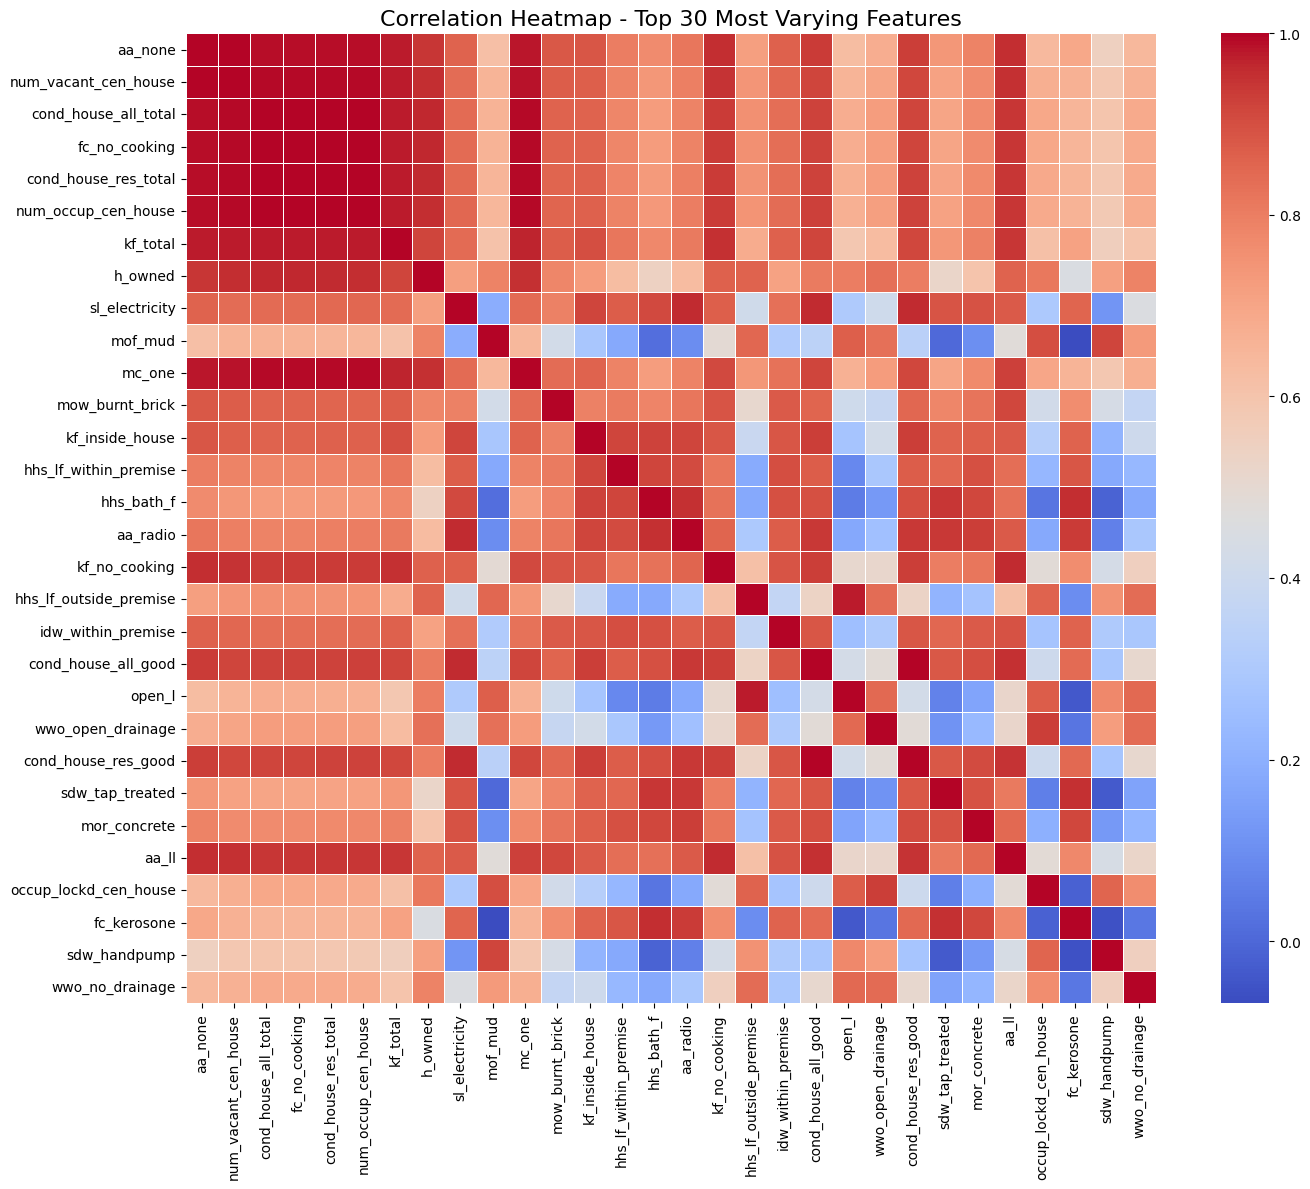

In [ ]:
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Calculate standard deviation and pick top 30 most varying columns
top30_cols = numeric_df.std().sort_values(ascending=False).head(30).index
corr_matrix = numeric_df[top30_cols].corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5, square=True)
plt.title("Correlation Heatmap - Top 30 Most Varying Features", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Select numeric columns
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Flatten matrix
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations
filtered = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]

# Remove duplicate pairs (like (A,B) and (B,A))
filtered['Pair'] = filtered.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)
filtered = filtered.drop_duplicates(subset='Pair').drop(columns='Pair')

# Get top 15 positive
top_pos = filtered[filtered['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(15)

# Get top 15 negative
top_neg = filtered[filtered['Correlation'] < 0].sort_values(by='Correlation', ascending=True).head(5)

# Combine
mixed_corrs = pd.concat([top_pos, top_neg], ignore_index=True)

# Show result
mixed_corrs

/tmp/ipython-input-10-1779176016.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Pair'] = filtered.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)


,Feature 1,Feature 2,Correlation
0,fc_other,kf_no_o_k,1.000000
1,cond_house_all_total,fc_no_cooking,1.000000
2,cond_house_res_oth_total,occup_res,0.999894
3,cond_house_res_total,num_occup_cen_house,0.999893
4,cond_house_all_delapidated,cond_house_res_delapidated,0.999781
5,cond_house_all_good,cond_house_res_good,0.999714
6,cond_house_res_total,fc_no_cooking,0.999342
7,cond_house_all_total,cond_house_res_total,0.999342
8,fc_no_cooking,num_occup_cen_house,0.999196
9,cond_house_all_total,num_occup_cen_house,0.999196


Here you go — properly numbered, decoded, and ready to copy-paste into your report or notebook:

🔼 Top 15 Positive Correlations (with short feature name meanings)

1)fc_other ↔ kf_no_o_k
fc_other: House uses “Other” type of fuel
kf_no_o_k: No kitchen or cooking space in the house
→ Households using other/unidentified fuels tend to lack proper kitchen setups — unsafe and informal cooking.


2)cond_house_all_total ↔ fc_no_cooking
cond_house_all_total: Total number of houses in all conditions
fc_no_cooking: Houses with no cooking facility
→ More houses overall means more houses without cooking facilities — infrastructure not keeping up with volume.



3)cond_house_res_oth_total ↔ occup_res
cond_house_res_oth_total: Other residential houses (e.g., temporary, unconventional)
occup_res: Houses occupied for residence
→ These alternate houses are usually occupied — the distinction is often technical.


4)cond_house_res_total ↔ num_occup_cen_house
cond_house_res_total: Total residential houses
num_occup_cen_house: Occupied census houses
→ More houses built → more get occupied — a direct and expected link.


5)cond_house_all_delapidated ↔ cond_house_res_delapidated
cond_house_all_delapidated: Total dilapidated houses
cond_house_res_delapidated: Dilapidated houses used for residence
→ Many bad-condition houses are still in use — signs of housing distress.


6)cond_house_all_good ↔ cond_house_res_good
cond_house_all_good: All good-condition houses
cond_house_res_good: Good residential houses
→ Most well-maintained buildings are lived in — very few good-condition non-residential buildings.


7)cond_house_res_total ↔ fc_no_cooking
cond_house_res_total: Total residential houses
fc_no_cooking: No cooking facility
→ Residential construction doesn’t guarantee kitchen access — a quality vs quantity gap.


8)cond_house_all_total ↔ cond_house_res_total
cond_house_all_total: Total houses
cond_house_res_total: Total residential houses
→ Nearly all houses are for residence — shows census coverage is primarily residential.


9)fc_no_cooking ↔ num_occup_cen_house
fc_no_cooking: No cooking facility
num_occup_cen_house: Occupied houses
→ Even occupied homes often lack cooking facilities — poor living standards.


10)cond_house_all_total ↔ num_occup_cen_house
cond_house_all_total: Total houses
num_occup_cen_house: Occupied census houses
→ More houses = more occupancy — just a size effect.


11)cond_house_all_livable ↔ cond_house_res_livable
cond_house_all_livable: Livable condition (total)
cond_house_res_livable: Livable residential houses
→ Almost all livable houses are used for residence — expected.


12)aa_none ↔ num_vacant_cen_house
aa_none: Houses with no household assets (TV, phone, etc.)
num_vacant_cen_house: Vacant census houses
→ Places with asset-less homes also show more vacancy — hinting at poor resource allocation or affordability gap.


13)cond_house_all_total ↔ num_vacant_cen_house
cond_house_all_total: Total houses
num_vacant_cen_house: Vacant houses
→ More housing stock also means more unused houses — quantity doesn't imply utilization.


14)fc_no_cooking ↔ num_vacant_cen_house
fc_no_cooking: No cooking facility
num_vacant_cen_house: Vacant houses
→ Vacant homes often don’t have kitchens — they’re possibly incomplete or abandoned.


15)num_vacant_cen_house ↔ num_occup_cen_house
num_vacant_cen_house: Vacant houses
num_occup_cen_house: Occupied houses
→ Larger districts have more of both — higher housing stock overall.

🔽 Top 5 Negative Correlations

16)district_code ↔ mof_burnt_brick
mof_burnt_brick: Floor made of burnt brick
→ As district code increases (possibly geographic shift), burnt brick floors decrease — regional construction style shift.


17)state_code ↔ mof_burnt_brick
state_code: State ID
→ Higher-coded states (likely east/south) use less burnt brick flooring.
district_code ↔ mor_burnt_brick
mor_burnt_brick: Roof made of burnt brick
→ Burnt brick roofs are more common in early-coded (possibly northern) districts.

18)state_code ↔ mor_burnt_brick
mor_burnt_brick: Roof made of burnt brick
→ States differ in roofing materials — could be due to culture or availability.


19)district_code ↔ mor_stone_slate
mor_stone_slate: Roof made of stone or slate
→ Slate/stone roofs are negatively correlated with district number — possibly mountainous or older regions.


 A clustered heatmap helps you visually verify the strongest positive/negative relationships and spot groupings among features.




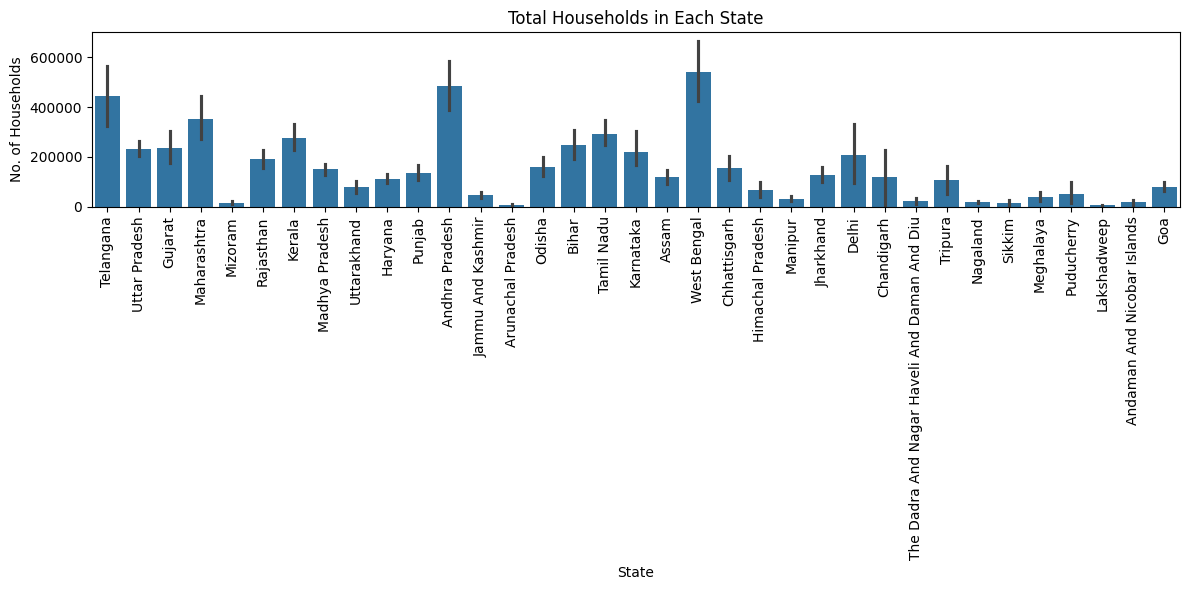

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='state_name', y='cond_house_all_total')
plt.xticks(rotation=90)
plt.title('Total Households in Each State')
plt.ylabel('No. of Households')
plt.xlabel('State')
plt.tight_layout()
plt.show()

**Observation:**

States like West Bengal, Maharashtra, and Uttar Pradesh have the highest number of households, whereas smaller states and union territories such as Lakshadweep and Andaman & Nicobar Islands have significantly fewer households.

**Insight:**

This indicates that housing policies and infrastructure programs should be prioritized in states with larger populations to address the higher demand for housing and related amenities.

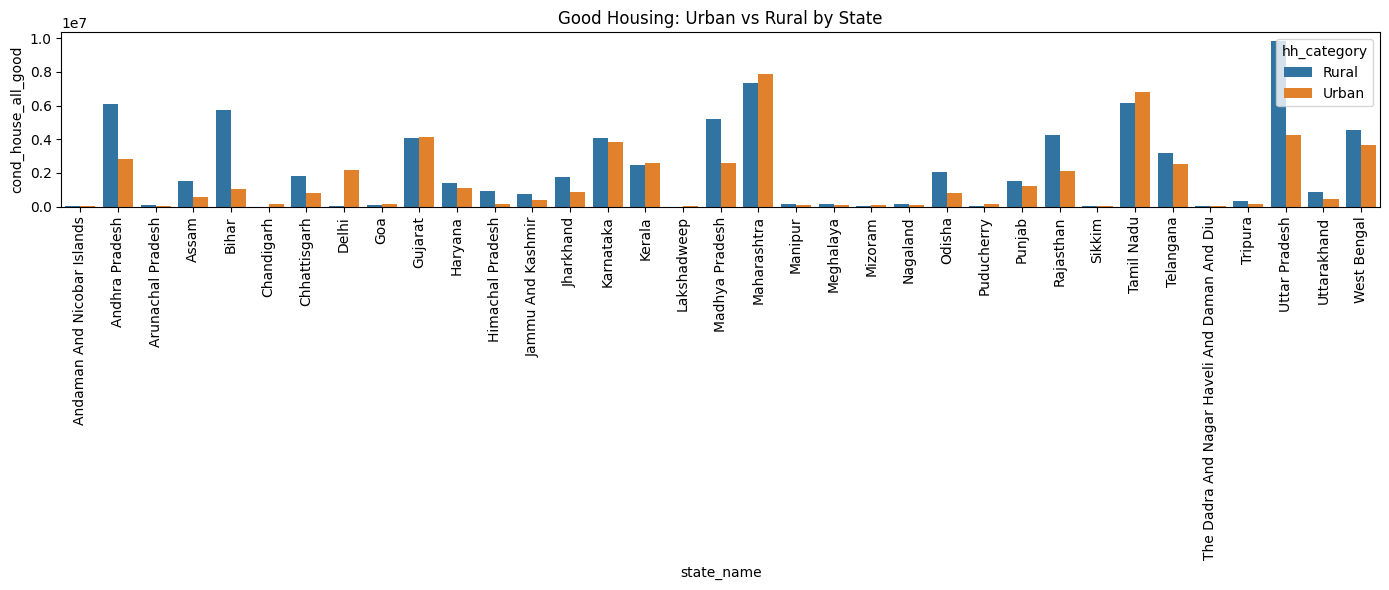

In [ ]:
urban_rural = df.groupby(["state_name", "hh_category"])[["cond_house_all_good", "cond_house_all_livable", "cond_house_all_delapidated"]].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
sns.barplot(x="state_name", y="cond_house_all_good", hue="hh_category", data=urban_rural)
plt.title("Good Housing: Urban vs Rural by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observation:**

Urban regions generally have a higher number of good-condition houses compared to rural areas, except in states like Uttar Pradesh and Bihar, where rural housing dominates due to their larger rural populations.

**Insight:**

The disparity between urban and rural housing quality highlights the need for rural infrastructure development to bridge the housing condition gap between these regions.

In [ ]:
print(df.columns)


Index(['id', 'census_year', 'state_name', 'state_code', 'district_name',
       'district_code', 'hh_category', 'cond_house_all_total',
       'cond_house_all_good', 'cond_house_all_livable',
       ...
       'occup_res', 'occup_res_cum_otheruse', 'occup_shop_off',
       'occup_sch_coll', 'occup_hot_lodg_guesthoose', 'occup_hosp_dispen',
       'occup_fact_workshop_workshed', 'occup_worship_place',
       'occup_oth_non_residen', 'occup_lockd_cen_house'],
      dtype='object', length=149)


/tmp/ipython-input-22-81441910.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state_code', y='fc_no_cooking', data=state_df, palette='Reds_d')


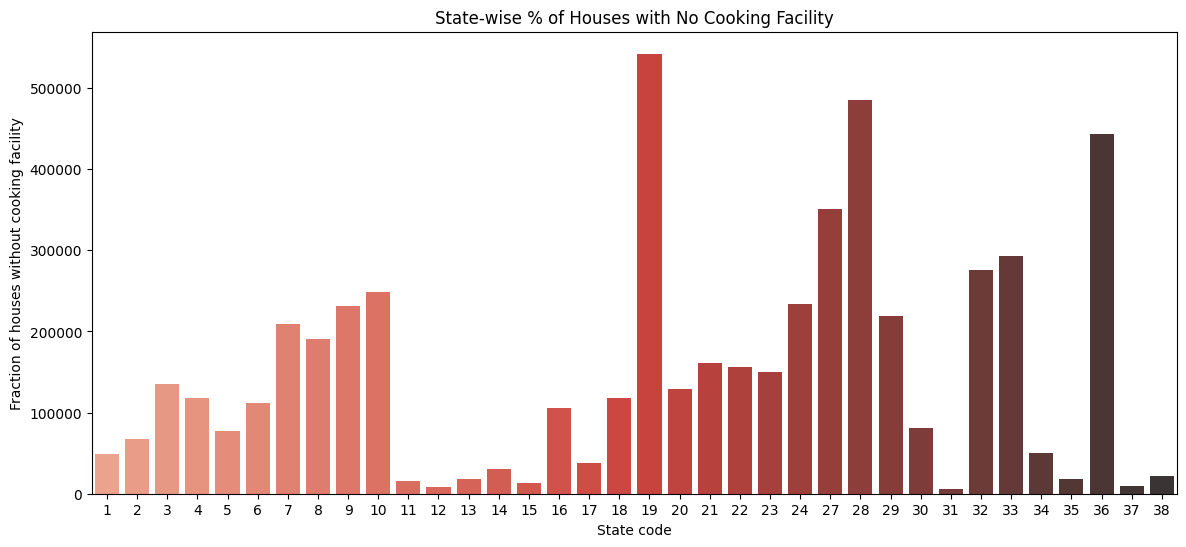

In [ ]:
state_df = df.groupby('state_code').agg({
    'fc_no_cooking': 'mean',
    'kf_no_o_k': 'mean'
}).reset_index()

state_df = state_df.sort_values('fc_no_cooking', ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x='state_code', y='fc_no_cooking', data=state_df, palette='Reds_d')
plt.ylabel('Fraction of houses without cooking facility')
plt.xlabel('State code')
plt.title('State-wise % of Houses with No Cooking Facility')
plt.show()


**Observation:**

States such as Maharashtra, Uttar Pradesh, and West Bengal have a high fraction of houses without cooking facilities, while smaller states and UTs like Sikkim and Goa have relatively lower percentages.

**Insight:**

This suggests that regions with larger populations may face infrastructure gaps in providing basic amenities, emphasizing the need for targeted policies to improve cooking facilities in high-deficit states.

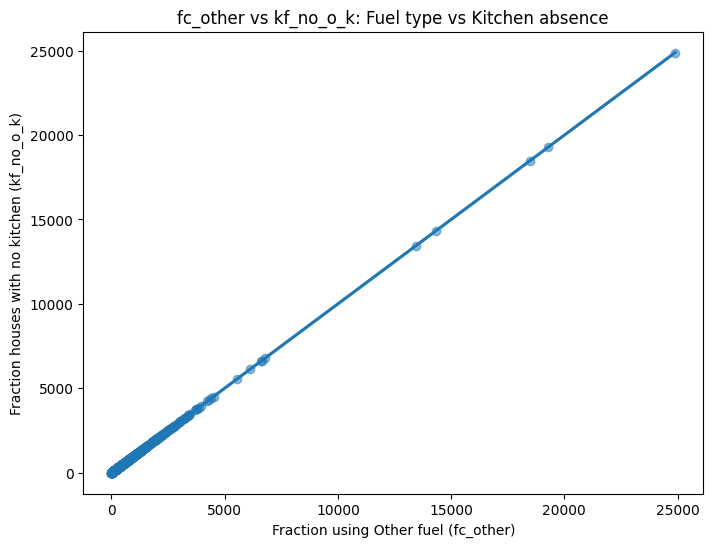

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='fc_other', y='kf_no_o_k', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Fraction using Other fuel (fc_other)')
plt.ylabel('Fraction houses with no kitchen (kf_no_o_k)')
plt.title('fc_other vs kf_no_o_k: Fuel type vs Kitchen absence')
plt.show()


**Observation:**

The scatter plot shows a near-perfect linear correlation between the fraction of houses using "other fuel" and the fraction of houses without a kitchen, indicating a very strong positive relationship.

**Insight:**

This implies that in areas where alternative fuel use is high, kitchen absence is also significantly prevalent, highlighting a strong link between fuel access and housing infrastructure.

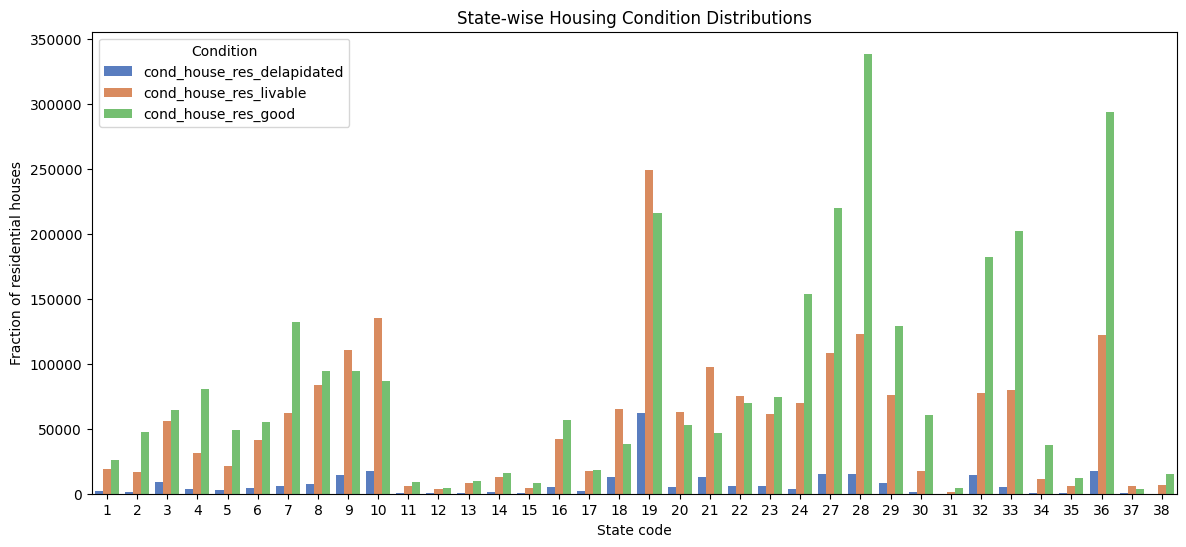

In [ ]:
quality = df.groupby('state_code').agg({
    'cond_house_res_delapidated': 'mean',
    'cond_house_res_livable': 'mean',
    'cond_house_res_good': 'mean'
}).reset_index().melt(id_vars='state_code', var_name='condition', value_name='fraction')

plt.figure(figsize=(14,6))
sns.barplot(x='state_code', y='fraction', hue='condition', data=quality, palette='muted')
plt.ylabel('Fraction of residential houses')
plt.xlabel('State code')
plt.title('State-wise Housing Condition Distributions')
plt.legend(title='Condition')
plt.show()


**Observation**

The graph displays the state-wise distribution of residential housing conditions categorized into Good, Livable, and Dilapidated. States like Maharashtra (27), West Bengal (19), and Karnataka (28) have a significantly higher number of good-condition houses compared to other states. However, states such as Uttar Pradesh (9) and Bihar (10) show a notable presence of livable and dilapidated houses, highlighting disparities in housing quality. Smaller states and union territories reflect relatively balanced but lower housing counts across all categories.

**Insight**

This chart underscores a clear housing quality gap between states. While developed states like Maharashtra and Karnataka lead in good-condition housing, states with large populations, such as Uttar Pradesh and Bihar, face quality challenges with a considerable share of substandard housing. This calls for targeted housing improvement programs and infrastructure investments in these regions to enhance living conditions and reduce the reliance on livable or dilapidated housing.







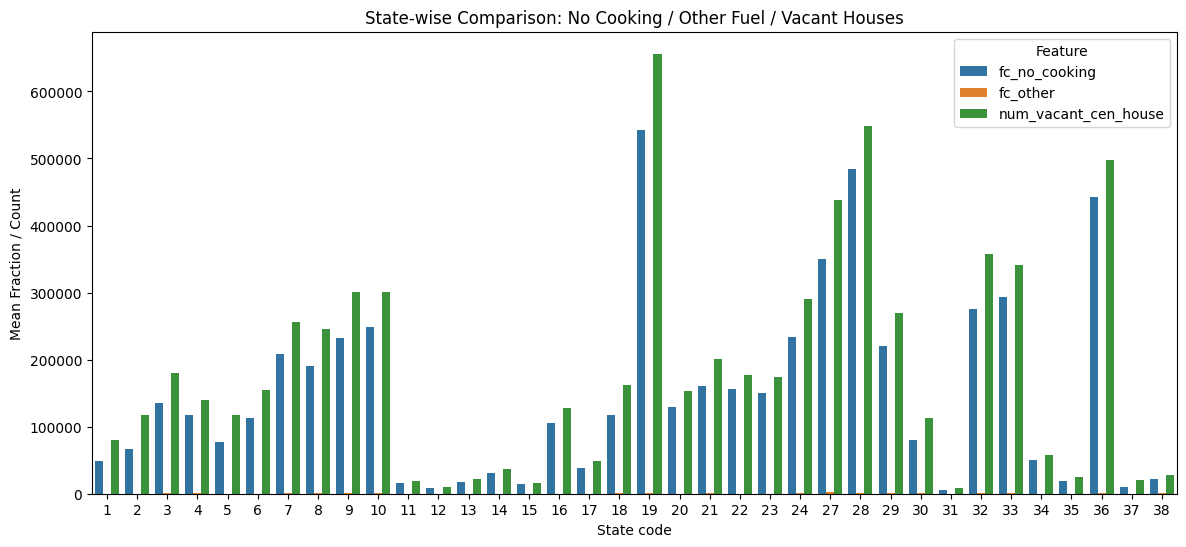

In [ ]:
features = ['fc_no_cooking', 'fc_other', 'num_vacant_cen_house']
state_multi = df.groupby('state_code')[features].mean().reset_index()

state_multi = state_multi.melt(id_vars='state_code', var_name='feature', value_name='value')

plt.figure(figsize=(14,6))
sns.barplot(x='state_code', y='value', hue='feature', data=state_multi)
plt.ylabel('Mean Fraction / Count')
plt.xlabel('State code')
plt.title('State-wise Comparison: No Cooking / Other Fuel / Vacant Houses')
plt.legend(title='Feature')
plt.show()


**Observation**

The chart compares three features across states: houses with no cooking facilities (fc_no_cooking), houses using other fuel types (fc_other), and vacant houses (num_vacant_cen_house). States like West Bengal (19), Maharashtra (27), and Bihar (10) exhibit high counts across all three features, with vacant houses being especially prominent. States such as Uttar Pradesh (9) and Gujarat (24) also show a significant number of households lacking proper cooking facilities. Meanwhile, smaller states and union territories have considerably lower values in all three categories.

**Insight**

This visualization highlights a strong correlation between poor amenities and housing vacancy. States with many houses lacking proper cooking facilities or using alternative fuels also tend to have higher vacancy rates, indicating inadequate living conditions as a potential cause for abandonment. Targeted improvements in basic amenities like kitchens and clean fuel access, especially in states such as West Bengal, Maharashtra, and Bihar, could reduce vacancy rates and improve overall housing utilization.









Ask ChatGPT


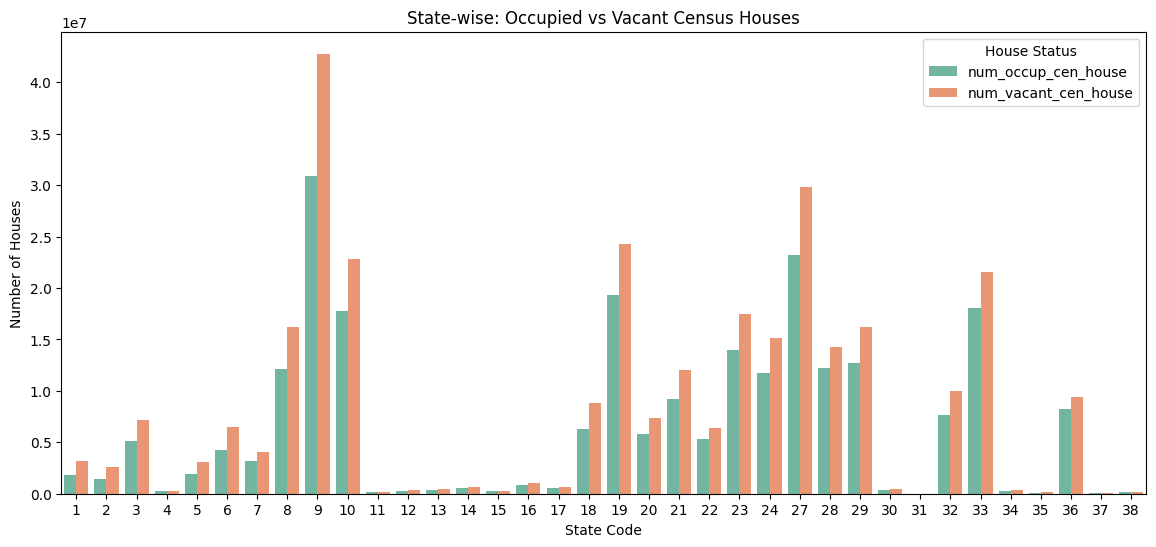

In [ ]:
occupancy = df.groupby('state_code').agg({
    'num_occup_cen_house': 'sum',
    'num_vacant_cen_house': 'sum'
}).reset_index()

occupancy = occupancy.melt(id_vars='state_code', var_name='status', value_name='count')

plt.figure(figsize=(14,6))
sns.barplot(data=occupancy, x='state_code', y='count', hue='status', palette='Set2')
plt.title("State-wise: Occupied vs Vacant Census Houses")
plt.xlabel("State Code")
plt.ylabel("Number of Houses")
plt.legend(title="House Status")
plt.show()


**Observation**

The chart compares the number of occupied and vacant census houses across Indian states. Uttar Pradesh (State Code 9) has the highest housing stock in both categories, with vacant houses outnumbering occupied ones. Similarly, Maharashtra (27) and Bihar (10) also show large housing volumes with significant vacancy levels. Many other states, including West Bengal (19) and Gujarat (24), display a similar trend of high vacancy despite a large number of occupied homes. Smaller states and union territories (codes 12–16 and 35–38) have proportionally lower counts in both categories.

**Insight**

The data highlights a serious mismatch between housing availability and utilization. High vacancy levels in states like Uttar Pradesh, Bihar, and Maharashtra may indicate issues such as poor housing quality, affordability barriers, or unequal distribution of housing. Meanwhile, states with smaller populations show balanced occupancy and vacancy levels. Addressing these gaps will require targeted policies focusing on affordable housing programs, urban planning improvements, and rehabilitation of unoccupied homes to ensure effective housing utilization.

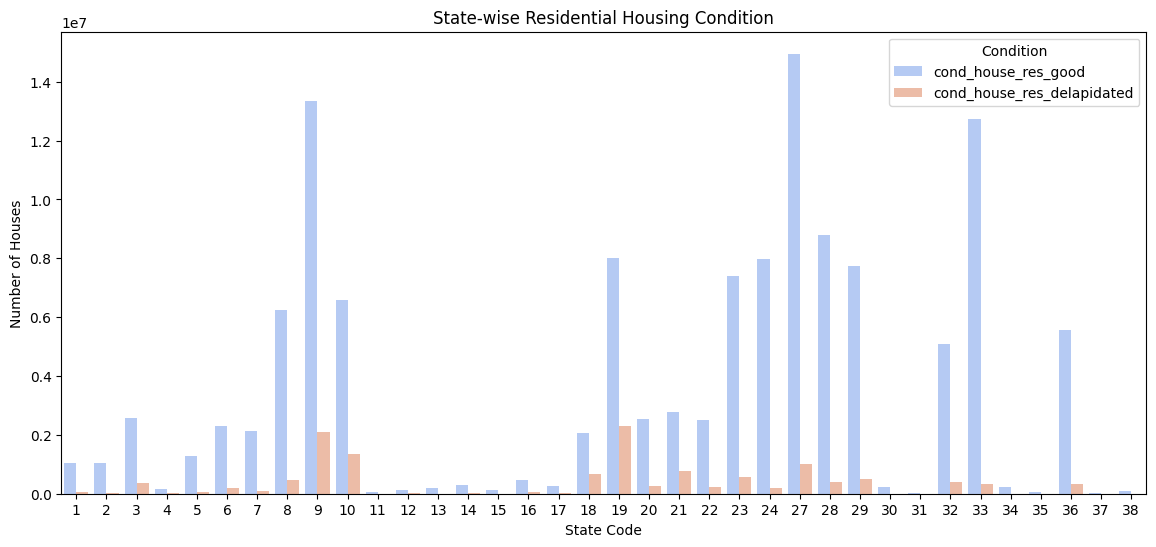

In [ ]:
housing_quality = df.groupby('state_code').agg({
    'cond_house_res_good': 'sum',
    'cond_house_res_delapidated': 'sum'
}).reset_index()

housing_quality = housing_quality.melt(id_vars='state_code', var_name='condition', value_name='count')

plt.figure(figsize=(14,6))
sns.barplot(data=housing_quality, x='state_code', y='count', hue='condition', palette='coolwarm')
plt.title("State-wise Residential Housing Condition")
plt.xlabel("State Code")
plt.ylabel("Number of Houses")
plt.legend(title="Condition")
plt.show()


**Observation**

The chart shows the distribution of good and dilapidated residential houses across Indian states. Uttar Pradesh (State Code 9) has the highest housing count, with a significant number of dilapidated homes alongside a large stock of good houses. Maharashtra (27) and West Bengal (19) also display high numbers of good houses but still have notable dilapidated housing. In contrast, smaller states and union territories have fewer houses across both categories, reflecting their population size.

**Insight**

This visualization emphasizes the housing quality gap in high-population states. While states like Maharashtra and Gujarat have a higher proportion of good-condition houses, states such as Uttar Pradesh and Bihar continue to struggle with a considerable share of dilapidated homes. This highlights the urgent need for renovation and infrastructure improvement programs in regions where housing quality remains poor, despite a large housing stock. Strengthening housing quality in these states could greatly improve living standards and reduce structural risks.

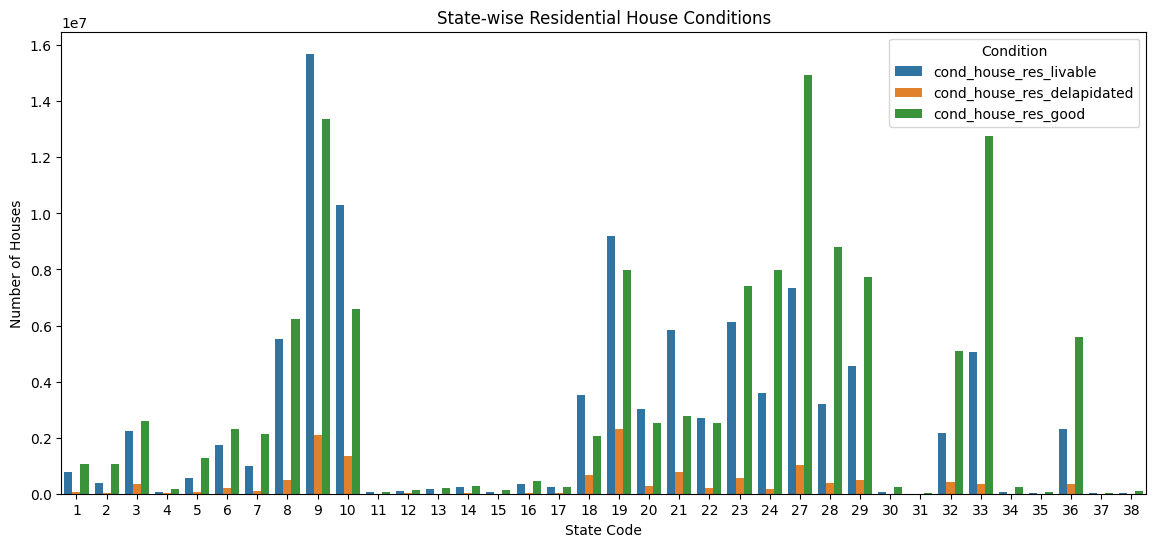

In [ ]:
livable = df.groupby('state_code').agg({
    'cond_house_res_livable': 'sum',
    'cond_house_res_delapidated': 'sum',
    'cond_house_res_good': 'sum'
}).reset_index()

livable = livable.melt(id_vars='state_code', var_name='condition', value_name='count')

plt.figure(figsize=(14,6))
sns.barplot(x='state_code', y='count', hue='condition', data=livable)
plt.title("State-wise Residential House Conditions")
plt.xlabel("State Code")
plt.ylabel("Number of Houses")
plt.legend(title='Condition')
plt.show()


**Observation**

The bar chart titled "State-wise Residential House Conditions" presents the distribution of residential houses across Indian states, segmented into three categories: Good, Livable, and Dilapidated. The most prominent observation is that State Code 9 (Uttar Pradesh) has the highest number of residential houses, with a substantial share categorized as livable and good. However, a notable portion also falls under the dilapidated category. State Code 10 (Bihar) and State Code 27 (Maharashtra) follow closely in total house count. Maharashtra exhibits a majority of houses in good condition, whereas Bihar has a significantly larger proportion of dilapidated homes, suggesting lower housing quality. States such as West Bengal (18), Odisha (21), and Assam (5) also display high counts of livable and dilapidated houses, while smaller states and union territories (codes 35–38) predictably have fewer houses across all categories due to lower population sizes

**Insight**

This chart reveals a significant quality gap in housing infrastructure across Indian states. High-population states such as Uttar Pradesh, Bihar, and West Bengal face the dual challenge of large housing stocks and a substantial share of homes in substandard or dilapidated condition, pointing to deep-rooted infrastructure and maintenance issues. Western states like Maharashtra and Gujarat demonstrate relatively better housing standards, with a greater proportion of homes classified as good. This reflects broader regional disparities in infrastructure development. The data suggests a need for targeted housing interventions, especially in states where livable and dilapidated houses dominate. Upgrading existing housing conditions—rather than just increasing quantity—should be a policy priority. Enhancing housing quality can significantly improve health, safety, and the overall well-being of citizens, particularly in underserved regions.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Columns: 149 entries, id to occup_lockd_cen_house
dtypes: float64(142), int64(4), object(3)
memory usage: 1.5+ MB


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("census-household-amenities.csv")  # Replace with the actual filename

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'census-household-amenities.csv'

In [2]:
from google.colab import files

# Save the cleaned dataset as CSV
df.to_csv('cleaned_census_dataset.csv', index=False)

# Download the file to your local system
files.download('cleaned_census_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>